# 04. Teoria mnogości - część 1

**Tresci kształcenia:** Podstawy teorii mnogości. Zbiory i operacje na zbiorach. Pojęcie zbioru, zbioru pustego, elementu, należenia, inkluzji. Podzbiory prostej rzeczywistej, przedziały, suma, przekrój, różnica zbiorów. Zbiory przeliczalne i nieprzeliczalne. 

**Efekty kształcenia:** Student potrafi wykonać podstawowe operacje na zbiorach, określić ich przeliczalność. 

# Wstęp

Podczas tych zajęć zajmiemy się pojęciem **zbioru**, kluczowym dla całej matematyki. Intuicyjnie, zbiorem nazywamy pewną kolekcję obiektów. Przyjmujemy, że pojęcie zbioru oraz pojęcie należenia do zbioru są pojęciami pierwotnymi, tzn. nie wymagają one definicji.

Zapis $a \in A$ oznacza, że obiekt $a$ jest elementem zbioru $A$. Przykładowo, $2 \in \mathbb N$ (tzn. dwa należy do zbioru liczb naturalnych). Aby powiedzieć, że a **nie** jest elementem zbioru $A$, zapisujemy $a \not \in A$.

Najprostszym sposobem określenia zbioru jest wyliczenie jego elementów. Przykładowo $\{ 1, 2, 3 \}$ to zbiór złożony z trzech elementów - 1, 2 oraz 3. Wyliczenia możemy też dokonać, w sposób skrócony, za pomocą trzykropka, jeżeli jasne jest jakie elementy mamy na myśli. Przykładowo:
- $\{ 1, 2, \ldots, 2000 \}$ oznacza zbiór, którego elementami są liczby od 1 do 2020,
- $\{ 2, 4, 6, 8, 10, \ldots \}$ oznacza zbiór dodatnich liczb parzystych.

Innym sposobem zdefiniowania zbioru jest określenie warunku, który mają spełniać jego elementy. Zbiór taki zapisujemy w następujący sposób:

$$
\{ x : \textrm{warunek, jaki ma spełniać element } x \}.
$$

Przykładowo

$$
\{ x : x \textrm{ jest liczbą rzeczywistą oraz  } (x-1) \cdot (x-2) = 0 \}
$$

oznacza zbiór liczb rzeczywistych $x$, które spełniają równanie $(x-1) \cdot (x-2) = 0$.  Zbiór ten można zapisać również w taki sposób:

$$
\{ x \in \mathbb R : (x-1) \cdot (x-2) = 0 \},
$$

a także w taki: $\{1, 2\}$.

---
# Przykłady zbiorów

Szczególny przykład zbioru stanowi **zbiór pusty**, oznaczany jako $\varnothing$. Jest to zbiór, który nie ma żadnych elementów. Literami $\mathbb R$, $\mathbb Q$, $\mathbb Z$, $\mathbb N$ oznacza się zazwyczaj zbiory liczb rzeczywistych, wymiernych, całkowitych i naturalnych.

**Przedziały liczbowe** to podzbiory zbioru liczb rzeczywistych, czyli liczby które znajdują się między dwiema danymi. Istnieją cztery rodzaje przedziałów:
- przedziały otwarte: $(a, b) = \{ x \in \mathbb R : a < x < b \}$
- przedziały domknięte: $[a, b] = \{ x \in \mathbb R : a \le x \le b \}$
- przedziały lewostronnie domknięte: $[a, b) = \{ x \in \mathbb R : a \le x < b \}$
- przedziały prawostronnie domknięte: $(a, b] = \{ x \in \mathbb R : a < x \le b \}$

Różnią się one tym, czy końce przedziałów (liczby $a$ i $b$) należą do nich. Dodatkowo rozpatruje się przedziały nieograniczone, w których lewy koniec oznacza się jako $-\infty$ lub też prawy przez $\infty$. Przykładowo:

$$
[a, \infty) = \{ x \in \mathbb R : a \le x \},
$$

$$
(-\infty, b) = \{ x \in \mathbb R : x < b \},
$$

$$
(-\infty, \infty) = \mathbb R.
$$

Rysując przedziały na osi liczb rzeczywistych, oznaczamy ich końce kółkami (zamalowanym kółkiem, jeżeli koniec należy do przedziału, i pustym w przeciwnym wypadku).

In [25]:
#Struktura RealSet w Sage'u pozwala na operowanie przedziałami osi rzeczywistej oraz ich sumami.
A = RealSet(1, 3)
B = RealSet([1, 3])
C = RealSet.closed_open(1, 3)
D = RealSet.open_closed(1, 3)
print("A = ", A)
print("B = ", B)
print("C = ", C)
print("D = ", D)

A =  (1, 3)
B =  [1, 3]
C =  [1, 3)
D =  (1, 3]


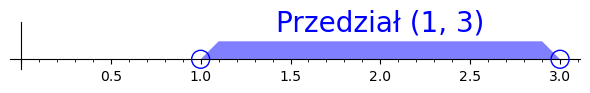

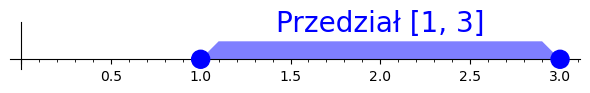

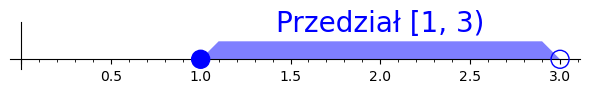

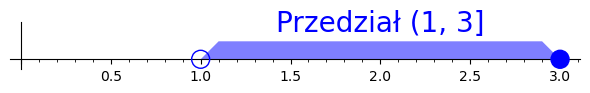

In [56]:
##Narysujemy teraz podane zbiory. Niestety, nie istnieje gotowa funkcja Sage'a pozwalająca na to.

A = RealSet(1, 3)
B = RealSet([1, 3])
C = RealSet.closed_open(1, 3)
D = RealSet.open_closed(1, 3)

## Ten kod służy do rysowania podzbiorów prostej rzeczywistej w zadanym kolorze i z zadanym podpisem.
def narysuj_przedzial(realset, kolor='blue', tekst=""):
    i = 0
    wynik = text("", (0, 0))
    try:
        while (i>=0):
            odcinek = realset.get_interval(i)
            a, b = odcinek.lower(), odcinek.upper()
            if a == b and odcinek.lower_closed() and odcinek.upper_closed():
                wynik += circle((a, 0), 0.05, fill=True, rgbcolor = kolor)
                i += 1
            else:
                if a == -oo:
                    a = -4
                    lewy_koniec = text("", (0, 0))
                else:
                    lewy_koniec = circle((a, 0), 0.05, rgbcolor = kolor, fill = odcinek.lower_closed())
                if b == oo:
                    b = 4
                    prawy_koniec = text("", (0, 0))
                else:
                    prawy_koniec = circle((b, 0), 0.05, rgbcolor = kolor, fill = odcinek.upper_closed())
                wynik += polygon2d([(a,0), (a+0.1,0.1), (b-0.1,0.1), (b,0)],  alpha=0.5, rgbcolor = kolor)+lewy_koniec+prawy_koniec

                if i==0:
                    wynik += text(tekst, ((a+b)/2,0.2), color = kolor, fontsize = 20)
                i+=1
    except:
        return wynik
    
## Narysujmy podane zbiory
narysuj_przedzial(A, tekst = "Przedział (1, 3)").show(ticks = [None, []])

narysuj_przedzial(B, tekst = "Przedział [1, 3]").show(ticks = [None, []])

narysuj_przedzial(C, tekst = "Przedział [1, 3)").show(ticks = [None, []])

narysuj_przedzial(D, tekst = "Przedział (1, 3]").show(ticks = [None, []])

---
# Równość zbiorów

Jak stwierdzić, czy dwa zbiory są równe? Służy do tego następująca zasada.

> ***Zasada ekstensjonalności***

>> Zbiory $A$ i $B$ są równe wtedy, i tylko wtedy gdy mają takie same elementy. 

Intuicyjnie mówiąc oznacza to, że przy określaniu zbioru nie ma znaczenia kolejność elementów, ani to ile razy zostały one wypisane. Przykładowo zbiory $A = \{ 1, 2, 1 \}$ oraz $B = \{ 2, 1 \}$ są równe, ponieważ elementami każdego z tych zbiorów są dwie liczby - 1 oraz 2. Nie ma znaczenia kolejność, w jakiej je wypisaliśmy oraz fakt, że jedna z nich była wypisana dwukrotnie.

In [2]:
# Python posiada zaimplementowaną strukturę zbioru. Jest to struktura, w której nie jest ważna kolejność
# ani liczba wystąpień elementu.
A = Set([1, 2, 1])
B = Set([2, 1])
print(A==B)

True


### Przykład
Podaj, ile różnych elementów mają zbiory
$A = \{x \in \mathbb Z : x^2 < 9 \}$ oraz $B = \{ 1, \{1\}, \{1, \{1\} \}\} $
i wymień je.

### Rozwiązanie
Nierówność $x^2 < 9$ jest spełniona wtedy i tylko wtedy, gdy $|x| < 3$. Zatem zbiór $A$ ma 5 elementów: -2, -1, 0, 1, 2.

Zbiór $B = \{ \color{red} 1 , \color{green} { \{1\} }, \color{blue} {\{1, \{1\} \} } \}$ ma 3 elementy:
- liczbę ${\color{red}1}$,
- $\color{green}{\{ 1 \} }$ (zbiór jednoelementowy złożony z liczby 1),
- $\color{blue}{\{ 1, \{1 \} \} }$ (zbiór dwuelementowy złożony z liczby 1 oraz ze zbioru jednoelementowego $\{ 1 \}$).

Zauważmy, że te elementy są między sobą różne. Przykładowo, $\color{red}{1} \neq \color{green}{\{ 1 \} }$, ponieważ $\color{red}{ 1 }$ jest liczbą, a $\color{green}{\{ 1 \}}$ - zbiorem.

In [1]:
B = Set([1, Set([1]), Set([1, Set([1])])]) #to jest zbiór B z zadania

#Ile elementów ma zbiór B?
print(B.cardinality())

3


---
# Podzbiory
Omówimy teraz pojęcie **podzbioru**.

> **Definicja**

>> Mówimy, że zbiór $A$ jest podzbiorem zbioru $B$, jeżeli każdy element zbioru $A$ jest też elementem zbioru $B$. Zapisujemy to w następujący sposób: $A \subset B$.

Jako prosty przykład zauważmy, że $\mathbb N \subset \mathbb R$, ponieważ każda liczba naturalna jest rzeczywista.

### Przykład
Rozważmy zbiory $A = \{ 1 \}$ oraz $B = \{\{1\}, 1, \varnothing \}$. Czy zachodzi $A \subset B$ lub też $B \subset A$?

Jedyny element $A$, czyli liczba jeden, należy do zbioru $B$. Zatem $A \subset B$.

Z drugiej strony $B$ nie jest podzbiorem $A$. Istotnie, zbiór $\{ 1 \}$ jest elementem B, ale $\{ 1 \} \not \in A$ (jedynym elementem zbioru $A$ jest liczba 1, a nie zbiór jednoelementowy $\{ 1 \}$!).

In [83]:
#Sprawdzimy, czy A jest podzbiorem B, i czy B jest podzbiorem A.

A = Set([1])
B = Set([Set([1]), 1, Set([])])
print(A.issubset(B))
print(B.issubset(A))

True
False


### Przykład

Ile podzbiorów ma zbiór $A = \{ 1, \{1 \} , \{ \{1 \} \} \}$?

Zbiór $A = \{ { \color{red} 1 }, \color{green} { \{1 \} }, \color{blue} { \{ \{1 \} \} } \}$ ma osiem podzbiorów: 
- jeden podzbiór zeroelementowy, tzn. zbiór pusty $\varnothing$,
- trzy podzbiory jednoelementowe: $\{ \color{red} {  1 } \}$, $\{ \color{green} { \{ 1 \} } \}$, $\{ \color{blue}{\{ \{ 1 \} \} } \}$,
- trzy podzbiory dwuelementowe: $\{ \color{red}{ 1}, \color{green}{ \{1 \} } \}$, $\{  \color{red}{ 1}, \color{blue}{ \{ \{1 \} \} } \}$, $\{ \color{green} { \{1 \} }, \color{blue}{ \{ \{1 \} \} } \}$
- jeden podzbiór trzyelementowy (cały zbiór): $\{ \color{red}{ 1}, \color{green}{ \{1 \} }, \color{blue}{\{ \{1 \} \} } \}$

In [84]:
#Wypiszmy podziory A.
A = Set([1, Set([1]), Set([Set([1])])])
for C in A.subsets():
    print(C)

{}
{1}
{{1}}
{{{1}}}
{1, {1}}
{1, {{1}}}
{{1}, {{1}}}
{1, {1}, {{1}}}


---
# Operacje na zbiorach

Przedstawimy teraz cztery podstawowe operacje na zbiorach. Przypomnijmy krótko, że symbol $\wedge$ oznacza "i", zaś symbol $\vee$ oznacza "lub".

**Sumą zbiorów $A$ i $B$** nazwiemy zbiór:

$$
A \cup B = \{ x : x \in A \vee x \in B \},
$$

tzn. zbiór złożony z tych elementów, które należą do zbioru A lub do zbioru B.

**Przekrojem zbiorów $A$ i $B$** nazwiemy zbiór:

$$
A \cap B = \{ x : x \in A \wedge x \in B \},
$$

tzn. zbiór złożony z tych elementów, które należą do zbioru A oraz do zbioru B. Jeżeli $A \cap B = \varnothing$ (tzn. A i B) nie mają wspólnych elementów, to mówimy, że A i B są **rozłączne**.

**Różnicą zbiorów $A$ i $B$** nazwiemy zbiór:

$$
A \setminus B = \{ x : x \in A \wedge x \not \in B \},
$$

tzn. zbiór złożony z tych elementów, które należą do zbioru A, ale nie należą do zbioru B.

Jeżeli zbiór $A$ jest częścią pewnego ustalonego zbioru $X$, definiujemy również **dopełnienie zbioru** $A$, jako elementy, które nie należą do $A$:

$$
A' = \{ x \in X : x \not \in A \}.
$$

Przykładowo dopełnieniem zbioru liczb wymiernych (w zbiorze liczb rzeczywistych) jest zbiór liczb niewymiernych.


Mówiąc o operacjach na zbiorach używamy często tzw. **diagramów Venna**. Do zobrazowania zbiorów i operacji na nich wykorzystuje się wówczas figury płaskie, zazwyczaj okręgi. Argument za pomocą diagramów Venna nie stanowi dowodu, ale pomaga w intuicyjnym zrozumieniu działań na zbiorach.

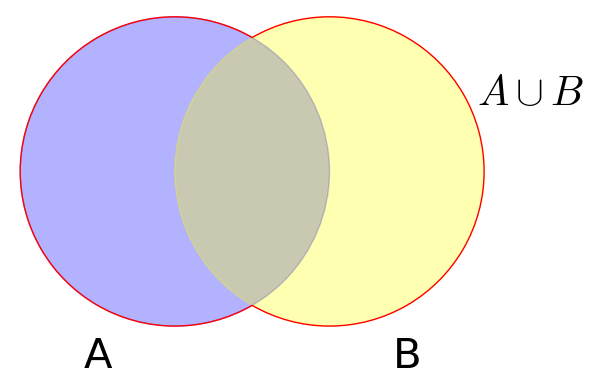

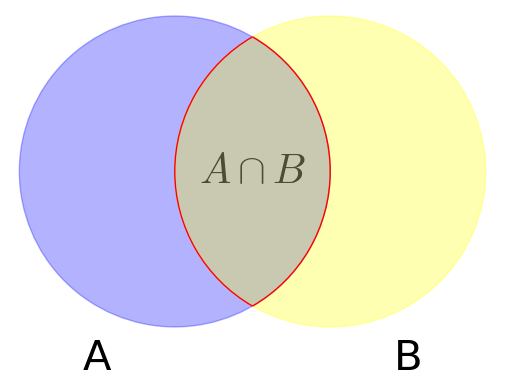

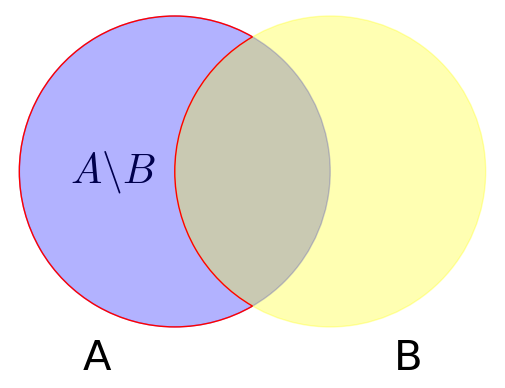

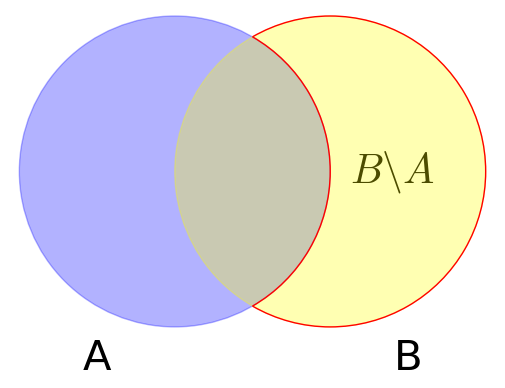

In [85]:
#kod pomocniczy generujący diagramy Venna
A = circle((0, 0), 1, color = 'blue', fill=True, alpha=0.3) + text('A',(-0.5,-1.2),rgbcolor='black', fontsize=30)
B = circle((1, 0), 1, color = 'yellow', fill=True, alpha=0.3) + text('B',(1.5,-1.2),rgbcolor='black', fontsize=30)

AsumB = arc((0,0), 1, sector=(pi/3, 5*pi/3), color='red')+arc((1,0), 1, sector=(pi+pi/3, pi+5*pi/3), color='red')+text(r'$A \cup B$',(2.3,0.5),rgbcolor='black', fontsize=30)
(A+B+AsumB).show(axes=false)

AcapB = arc((0,0), 1, sector=(-pi/3,pi/3), color='red')+arc((1,0), 1, sector=(2*pi/3,4*pi/3), color='red')+text(r'$A \cap B$',(0.5,0),rgbcolor='black', fontsize=30)
(A+B+AcapB).show(axes=false)

AminB = arc((0,0), 1, sector=(pi/3, 5*pi/3), color='red')+arc((1,0), 1, sector=(2*pi/3,4*pi/3), color='red')+text(r'$A \backslash B$',(-0.4,0),rgbcolor='black', fontsize=30)
(A+B+AminB).show(axes=false)

BminA = arc((1,0), 1, sector=(pi+pi/3, pi+5*pi/3), color='red')+arc((0,0), 1, sector=(pi+2*pi/3,pi+4*pi/3), color='red')+text(r'$B \backslash A$',(1.4,0),rgbcolor='black', fontsize=30)
(A+B+BminA).show(axes=false)

### Przykład
Znajdź $A \cup B$, $A \cap B$, $A \setminus B$ oraz $B \setminus A$ dla następujących zbiorów:

(a) $A = (−\infty; 3)$, $B = [-1; 4)$,

(b) $A = \{ 1, 2, 3 \}$, $B = [-1, 2) \cup \{ 3 \}$.

W każdym z przypadków narysuj wynik.

### Rozwiązanie

In [4]:
#(a)
A1 = RealSet(-oo, 3)
B1 = RealSet.closed_open(-1, 4)

#suma A oraz B
A1_suma_B1 = A1.union(B1)
pretty_print(LatexExpr("A \\cup B=" + str(A1_suma_B1)))

#przekrój A i B
A1_przekroj_B1 = A1.intersection(B1)
pretty_print(LatexExpr("A \\cap B=" + str(A1_przekroj_B1)))

#różnica A i B
A1_roznica_B1 = A1.difference(B1)
pretty_print(LatexExpr("A \\setminus B=" + str(A1_roznica_B1)))

#różnica B i A
B1_roznica_A1 = B1.difference(A1)
pretty_print(LatexExpr("B \\setminus A=" + str(B1_roznica_A1)))

A \cup B=(-oo, 4)

A \cap B=[-1, 3)

A \setminus B=(-oo, -1)

B \setminus A=[3, 4)

In [1]:
#(b)
A2 = RealSet([1, 1], [2, 2], [3, 3])
#Aby zdefiniować B, potrzebujemy dwóch zbiorów pomocnicznych:
P1 = RealSet.closed_open(-1, 2) #zbiór pomocniczy
P2 = RealSet([3, 3]) #zbiór pomocniczy
B2 = P1.union(P2) #B jest sumą dwóch zbiorów pomocniczych

#suma A oraz B
A2_suma_B2 = A2.union(B2)
pretty_print(LatexExpr("A \\cup B=" + str(A2_suma_B2)))

#przekrój A i B
A2_przekroj_B2 = A2.intersection(B2)
pretty_print(LatexExpr("A \\cap B=" + str(A2_przekroj_B2)))

#różnica A i B
A2_roznica_B2 = A2.difference(B2)
pretty_print(LatexExpr("A \\setminus B=" + str(A2_roznica_B2)))

#różnica B i A
B2_roznica_A2 = B2.difference(A2)
pretty_print(LatexExpr("B \\setminus A=" + str(B2_roznica_A2)))

A \cup B=[-1, 2] ∪ {3}

A \cap B={1} ∪ {3}

A \setminus B={2}

B \setminus A=[-1, 1) ∪ (1, 2)

In [14]:
## Ten kod służy do rysowania podzbiorów prostej rzeczywistej w zadanym kolorze i z zadanym podpisem.
def narysuj_przedzial(realset, kolor='blue', tekst=""):
    i = 0
    wynik = text("", (0, 0))
    try:
        while (i>=0):
            odcinek = realset.get_interval(i)
            a, b = odcinek.lower(), odcinek.upper()
            if a == b and odcinek.lower_closed() and odcinek.upper_closed():
                wynik += circle((a, 0), 0.05, fill=True, rgbcolor = kolor)
                if i==0:
                    wynik += text(tekst, (a,0.2), color = kolor, fontsize = 20)
                i += 1
            else:
                if a == -oo:
                    a = -4
                    lewy_koniec = text("", (0, 0))
                else:
                    lewy_koniec = circle((a, 0), 0.05, rgbcolor = kolor, fill = odcinek.lower_closed())
                if b == oo:
                    b = 4
                    prawy_koniec = text("", (0, 0))
                else:
                    prawy_koniec = circle((b, 0), 0.05, rgbcolor = kolor, fill = odcinek.upper_closed())
                wynik += polygon2d([(a,0), (a+0.1,0.1), (b-0.1,0.1), (b,0)],  alpha=0.5, rgbcolor = kolor)+lewy_koniec+prawy_koniec
                
                if i==0:
                    wynik += text(tekst, ((a+b)/2,0.2), color = kolor, fontsize = 20)
                i+=1
            
    except:
        return wynik

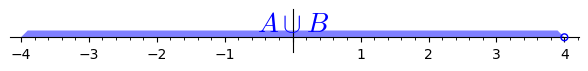

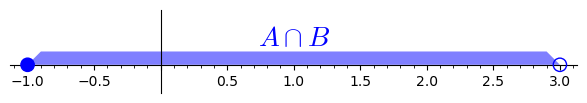

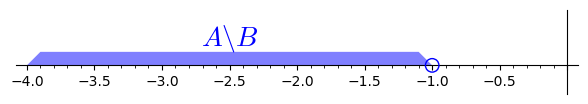

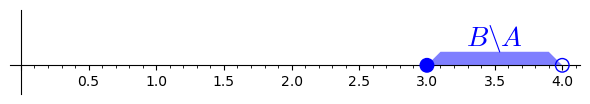

In [15]:
#(a)
(narysuj_przedzial(A1.union(B1), tekst = r"$A \cup B$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(A1.intersection(B1), tekst = r"$A \cap B$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(A1.difference(B1), tekst = r'$A \backslash B$', kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(B1.difference(A1), tekst = r"$B \backslash A$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, aspect_ratio = 1, ticks=[None, []])

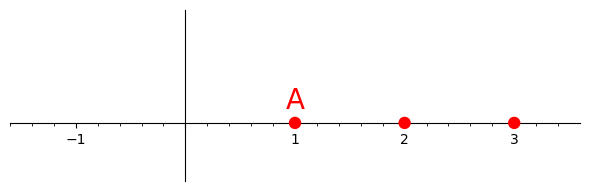

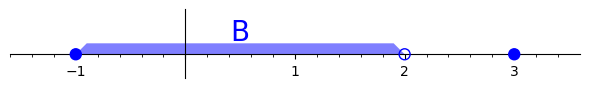

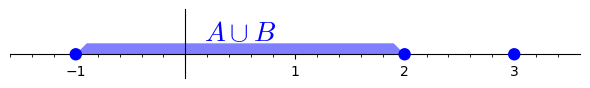

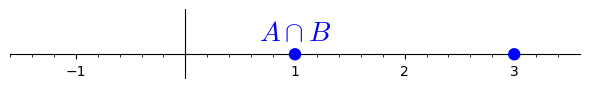

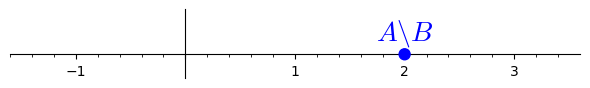

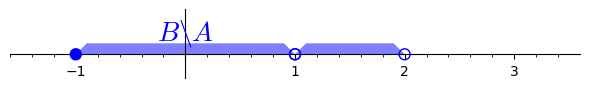

In [16]:
#(b)
(narysuj_przedzial(A2, tekst = "A", kolor = 'red')).show(ymin = -0.5, ymax = 1, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(B2, tekst = "B", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(A2.union(B2), tekst = r"$A \cup B$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(A2.intersection(B2), tekst = r"$A \cap B$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(A2.difference(B2), tekst = r'$A \backslash B$', kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])
(narysuj_przedzial(B2.difference(A2), tekst = r"$B \backslash A$", kolor = 'blue')).show(ymin = -0.2, ymax = 0.4, xmin = -1.5, xmax = 3.5, aspect_ratio = 1, ticks=[None, []])

### Przykład

Rozważmy następujące podzbiory płaszczyzny rzeczywistej:

$$
A = \{ (x, y) \in \mathbb R^2 : y \ge x^2 - 1 \},
$$

$$
B = \{ (x, y) \in \mathbb R^2 : x \cdot y > 0 \},
$$

$$
C = \{ (x, y) \in \mathbb R^2 : x \ge y \}.
$$

Narysuj zbiory $A \cap B \cap C$ oraz $(A \cup B) \setminus C$.

In [87]:
var('x', 'y')
A = region_plot([y >= x^2 - 1],(x,-5,5),(y,-5,5), alpha = 0.2, incol = 'green')
B = region_plot([x*y > 0],(x,-5,5),(y,-5,5), alpha = 0.2, incol = 'yellow')
C = region_plot([x >= y], (x,-5,5), (y,-5,5), alpha = 0.2, incol = 'red')

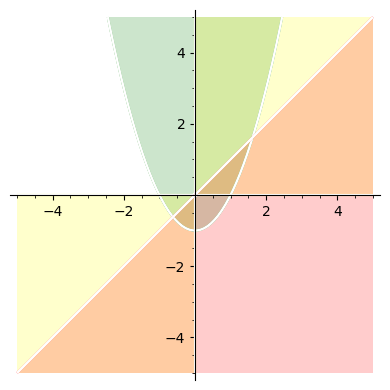

In [88]:
#Narysujmy wszystkie trzy obszary.
(A + B + C).show()

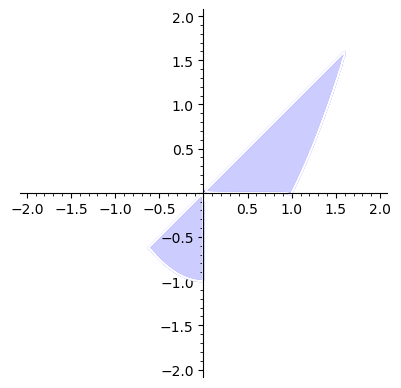

In [89]:
#Przekrój tych zbiorów to zbió określony przez wszystkie podane warunki
A_przekroj_B_przekroj_C = region_plot([y >= x^2 - 1, x >= y, x*y > 0],(x,-2,2),(y,-2,2), alpha = 0.2)
A_przekroj_B_przekroj_C.show()

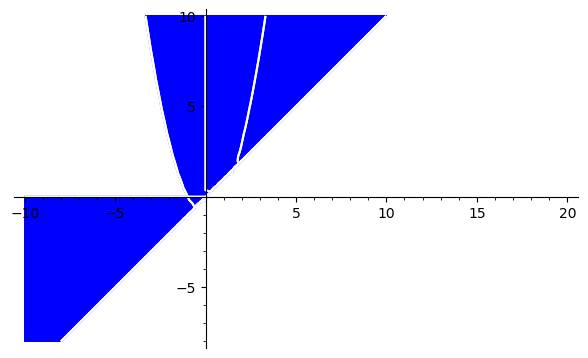

In [90]:
#Aby narysować (AuB)\C, wystarczy narysować A\C oraz B\C. A\C to zbiór punktów spełniających warunki
#definiujące zbiór A i niespełniających warunków definiujących zbiór C
var('x', 'y')
A_minus_C = region_plot([y >= x^2 - 1, x < y],(x,-10,20),(y,-8,10))
B_minus_C = region_plot([x*y > 0, x<y],(x,-10,20),(y,-8,10))
(A_minus_C+B_minus_C).show()

## Suma i przekrój ciągu zbiorów

Nauczyliśmy się już wyznaczać sumę i przekrój dla dwóch, trzech, czy ogólnie - dowolnej skończonej liczby zbiorów. Operacje te można jednak wykonać również dla ciągu zbiorów. Załóżmy, że $A_1, A_2, \ldots, $ jest nieskończonym ciągiem zbiorów. Wtedy definiujemy:

$$
\bigcup_{i = 1}^{\infty} A_i = \{ x : x \in A_i \textrm{ dla pewnego } i \},
$$

$$
\bigcap_{i = 1}^{\infty} A_i = \{ x : x \in A_i \textrm{ dla każdego } i \}.
$$

### Przykład

Niech $A_i = [\frac 1i, 1+\frac 1i]$ (przykładowo $A_1 = [1, 2]$, $A_2 = [\frac 12, \frac 32]$, ...). Znajdź $\bigcup_{i = 1}^{\infty} A_i$ oraz $\bigcap_{i = 1}^{\infty} A_i$.

In [91]:
#Ten kod oblicza sumę i przekrój dla pierwszych n przedziałów przy zadanym n.
n = 100
suma_przedzialow = RealSet([1/1, 1+1/1])
for i in range(1, n):
    suma_przedzialow.union(RealSet([1/i, 1+1/i]))
pretty_print(LatexExpr('\\bigcup_{i = 1}^{%d} A_i = '%(n)+str(suma_przedzialow)))
    
przekroj_przedzialow = RealSet([1/1, 1+1/1])
for i in range(1, n):
    przekroj_przedzialow = przekroj_przedzialow.intersection(RealSet([1/i, 1+1/i]))
pretty_print(LatexExpr('\\bigcap_{i=1}^{%d} A_i = '%(n)+str(przekroj_przedzialow)))    

\bigcup_{i = 1}^{100} A_i = [1, 2]

\bigcap_{i=1}^{100} A_i = [1, 100/99]

In [1]:
# Ten kod służy do rysowania podzbiorów prostej rzeczywistej w zadanym kolorze i z zadanym podpisem.
# Przedziały narysujemy z różnym kolorem i wysokością, żeby rysunek był bardziej czytelny.
def narysuj_przedzial(realset, kolor='blue', tekst="", wysokosc = 0.1):
    i = 0
    wynik = text("", (0, 0))
    try:
        while (i>=0):
            odcinek = realset.get_interval(i)
            a, b = odcinek.lower(), odcinek.upper()
            if a == b and odcinek.lower_closed() and odcinek.upper_closed():
                wynik += circle((a, 0), wysokosc/2, fill=True, rgbcolor = kolor)
                if i==0:
                    wynik += text(tekst, (a,2*wysokosc), color = 'black', fontsize = 10)
                i += 1
            else:
                if a == -oo:
                    a = -4
                    lewy_koniec = text("", (0, 0))
                else:
                    lewy_koniec = circle((a, 0), wysokosc/2, rgbcolor = kolor, fill = odcinek.lower_closed())
                if b == oo:
                    b = 4
                    prawy_koniec = text("", (0, 0))
                else:
                    prawy_koniec = circle((b, 0), wysokosc/2, rgbcolor = kolor, fill = odcinek.upper_closed())
                wynik += polygon2d([(a,0), (a+wysokosc,wysokosc), (b-wysokosc,wysokosc), (b,0)],  alpha=0.5, rgbcolor = kolor, edgecolor = 'black')+lewy_koniec+prawy_koniec
                
                if i==0:
                    wynik += text(tekst, ((a+b)/2,2*wysokosc), color = 'black', fontsize = 10)
                i+=1
            
    except:
        return wynik

def przekroj_przedzialow(n):
    A = RealSet([1, 2])
    C = narysuj_przedzial(A, kolor=(0.75, 0.85, 0.85), tekst="", wysokosc = 0.2)
    for i in range(1, n):
        A = RealSet([1/i, 1+1/i])
        C += narysuj_przedzial(A, kolor=(0.75, 0.85 - i*0.01, 0.85), tekst="", wysokosc = max(0.2 - 0.01*i, 0.01))
    return C

# Aplet rysujący przedziały.
@interact
def _(n = slider(0, 20)):
    C = przekroj_przedzialow(n)
    C.show()
    
przedzialy = [przekroj_przedzialow(3*n) + text("n = " + str(n), (0, 0.5)) for n in range(1, 6)]

Interactive function <function _ at 0x7f8fa37f8ca0> with 1 widget
  n: TransformIntSlider(value=0, min=0, max=20, step=1, description='n')

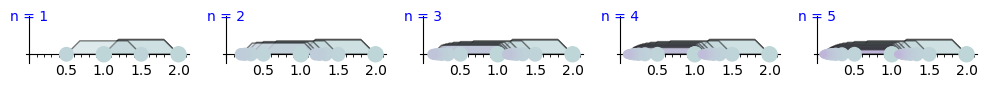

In [94]:
# Wersja statyczna powyższego apletu.
g1=graphics_array(przedzialy,ncols=5)
g1.show(figsize=[10,10], ticks = [None, []])

### Przykład

Sprawdź, korzystając z diagramów Venna, czy następujące równości są prawdziwe dla dowolnych zbiorów $A$, $B$, $C$. W przeciwnym wypadku podaj przykład zbiorów $A$, $B$, $C$, które nie spełniają danej równości.

(a) $(A \setminus B) \setminus C = A \setminus (B \cup C)$,

(b) $A \cup (B \setminus C) = (A \cup B) \setminus C$.

*Wskazówka: korzystając z poniższego apletu, możesz przetesować, czy dana równość zachodzi dla podanych przez Ciebie zbiorów.*

In [1]:
# Aplet służący do rysowania diagramów Venna dla zadanych zbiorów.

# Funkcja służąca do odpowiedniej zamiany zmiennej typu Set na string.
def f(s, braces=True): 
    t = ', '.join(sorted(list(s)))
    if braces: return '\\{' + t + '\\}'
    return t

# Funkcja służąca do zmiany odpowiedniej zmiennej typu String na zmienną typu Set.
def g(s): return set(str(s).replace(',',' ').split())

# Funkcja rysująca diagramy Venna.
def diagramy_venna(A, B, C):
    S = [g(A), g(B), g(C)]
    A,B,C = S
    AB = A & B
    AC = A & C
    BC = B & C
    ABC = AB & C
    A_minus_B = A.difference(B)
    A_minus_B_minus_C = A_minus_B.difference(C)
    B_suma_C = B.union(C)
    A_minus_B_suma_C = A.difference(B_suma_C)
    B_minus_C = B.difference(C)
    A_suma_nawias_B_minus_C = A.union(B_minus_C)
    A_suma_B = A.union(B)
    A_suma_B_minus_C = A_suma_B.difference(C)
    G = Graphics()
    G += text('$(A \\backslash B)\\backslash C ='+(f(A_minus_B_minus_C)) +'$', (4, 3))
    G += text("$A \\backslash (B \\cup C) = "+(f(A_minus_B_suma_C)) + '$', (4, 2.5))
    G += text("$A \\cup (B \\backslash C) = "+(f(A_suma_nawias_B_minus_C)) + '$', (4, 2))
    G += text("$(A \\cup B) \\backslash C = "+(f(A_suma_B_minus_C)) + '$', (4, 1.5))
    centers = [(cos(n*2*pi/3), sin(n*2*pi/3)) for n in [0,1,2]]
    scale = 1.7
    clr = ['yellow', 'blue', 'green']
    
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor=clr[i], 
             fill=True, alpha=0.3)
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor='black')

    # Plot what is in one but neither other
    for i in range(len(S)):
        C = set(S[i])
        for j in range(1,len(S)):
            C = C.difference(S[(i+j)%3])
        G += text(f(C,braces=False), (1.5*centers[i][0],1.7*centers[i][1]), rgbcolor='black')
        G += text(['A', 'B', 'C'][i], (2*centers[i][0],2*centers[i][1]), rgbcolor='black', fontsize = 15)


    # Plot pairs of intersections
    for i in range(len(S)):
        C = (set(S[i]) & S[(i+1)%3]) - set(ABC)
        Z = (1.3*cos(i*2*pi/3 + pi/3), 1.3*sin(i*2*pi/3 + pi/3))
        G += text(f(C,braces=False), Z, rgbcolor='black')

    # Plot intersection of all three
    G += text(f(ABC,braces=False), (0,0), rgbcolor='black')

    # Show it
    return G

#Aplet interaktywny.
@interact
def _(A='1,2,3,5', B='2,5,3,4,6', C='4, 6'):
    G = diagramy_venna(A, B, C)
    G.show(aspect_ratio=1, axes=False)
    
grafika = diagramy_venna(A='1,2,3,5', B='2,5,3,4,6', C='4, 6') + text("$A=\\{1,2,3,5\\}$, $B=\\{2,5,3,4,6\\}$, $C=\\{4, 6\\}$", (3, 4))

Interactive function <function _ at 0x7ff647b6c9d0> with 3 widgets
  A: Text(value='1,2,3,5', description='A')…

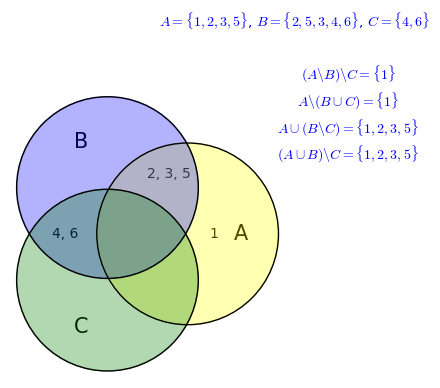

In [96]:
#wersja statyczna apletu
grafika.show(aspect_ratio=1, axes=False)

---
# Zadania do samodzielnego rozwiązania

### Przykład do samodzielnego rozwiązania

Oblicz i narysuj $A \cup B$, $A \cap B$, $A \setminus B$, $B \setminus A$ dla $A = [-\infty, 1] \cup \{ 2 \}$ B = $[0, 2] \cup \{ 3 \}$.

### Przykład do samodzielnego rozwiązania

Wypisz wszystkie dwuelementowe podzbiory zbioru $A = \{ 1, \{1 \}, \{1, \{1 \}\}, \{ \{1 \} \} \}$.

### Przykład do samodzielnego rozwiązania

Niech:

$$
A = \{ \{ 1, 1 \}, \{ 1, \{ 1\}, \{ \{ 1 \} \} \} \},
$$

$$
B = \{ x \in \mathbb R : x^2 + 1 < 0 \},
$$

$$
C = \{ \{ 1 \}, \{ 1 \} \}.
$$

Określ relacje pomiędzy zbiorami $A$, $B$, $C$ (tzn. który ze zbiorów jest podzbiorem innego z tych zbiorów).

### Przykład do samodzielnego rozwiązania

Rozważmy następujące podzbiory płaszczyzny:

$$
A = \{ (x, y) : x \le 0 \},
$$

$$
B = \{ (x, y) : -1 \le x \le 4 \wedge 0 \le y \le 5 \},
$$

$$
C = \{ (x, y) : x^2 + y^2 \le 4 \}.
$$

Narysuj zbiory $B \cup (A \cap C)$ oraz $(A \setminus B) \cap C$.

### Przykład do samodzielnego rozwiązania

Czy dla dowolnych zbiorów $A$, $B$, $C$ prawdziwe są równości:

(a) $A \cap B = A \setminus (A \setminus B)$,

(b) $(A \setminus C) \cup B = A \cup B$?

Uzasadnij za pomocą diagramów Venna lub podaj przykład zbiorów **nie** spełniających równości.